#                                          Automated Anomaly Detection for Predictive Maintenance

## Introduction

The data we have contains about 18000+ rows collected over few days. The column ‘y’ contains the binary labels, with 1 denoting there is an anomaly. The rest of the columns are predictors. This project aims to build a robust pipeline that includes data preprocessing, feature engineering, model training, and evaluation, ultimately deploying a model capable of identifying anomalies with high accuracy

## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import joblib

## Loading the dataset

In [2]:
df = pd.read_excel('AnomaData.xlsx')
df

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


## Exploratory Data Analysis

In [3]:
# Checking the data types of each column
df.dtypes

time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object

Let's look into more details of the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [5]:
# Summary statistics of each columns
df.describe()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,1999-05-15 01:20:42.728557312,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
min,1999-05-01 00:00:00,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,1999-05-08 03:36:30,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,1999-05-14 18:39:00,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,1999-05-22 06:01:30,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1999-05-29 00:06:00,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000
std,NaN,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120


In [6]:
#  Checking the missing values
df.isnull().sum()

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

There is no missing value in the dataset.

Let's check data imbalance with respect to target class i.e 'y'

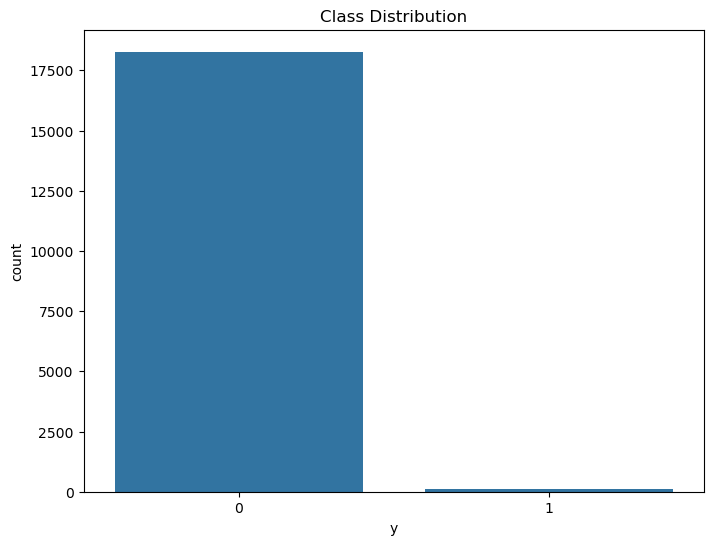

In [7]:
# Checking target class distribution
plt.figure(figsize=(8,6))
sns.countplot(x='y', data= df)
plt.title('Class Distribution')
plt.show()

In [8]:
Y=df['y']
Y.value_counts()

y
0    18274
1      124
Name: count, dtype: int64

**There is only 124 i.e 0.67% of the data represent anomalies. That means the data is highly imbalanced with respect to target class 'y'.**

Let's divide the target variable 'y' into two classes.

In [9]:
count_0 = df[df['y'] == 0]  # Majority class
count_1 = df[df['y'] == 1]  # Minority class


### Handling Outliers

In [10]:
# Handling outliers of only Majority class and features using IQR method
def remove_outliers(df, cols):
    filtered_df = df.copy()
    for col in cols:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        filtered_df = filtered_df[
            (filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)
        ]
    return filtered_df

features = [col for col in df.columns if col != 'y']

filtered_0 = remove_outliers(count_0, features)

          
data = pd.concat([filtered_0, count_1], axis=0,ignore_index=True)


In [11]:
print(data['y'].value_counts())


y
0    2347
1     124
Name: count, dtype: int64


In [12]:
print(data['y.1'].value_counts())


y.1
0    2452
1      19
Name: count, dtype: int64


In [13]:
# Dropping redundant column
data = data.drop(['y.1'], axis=1)


In [14]:
data

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
0,1999-05-02 05:32:00,0,-0.581214,-3.390954,3.297203,128.410132,0.021352,-2.817802,0.052928,-0.014526,...,-0.105480,29.984624,-0.949295,2.621830,-12.931332,-69.720938,-1.470630,0.018519,2.538279,0.007928
1,1999-05-02 05:42:00,0,-0.683737,-3.140092,3.710118,128.410162,0.119100,-4.533104,0.050782,-0.021135,...,-0.247081,29.984624,-1.090897,2.614077,-16.658505,-73.817160,0.452037,0.016828,2.543490,0.007893
2,1999-05-02 09:08:00,0,-0.721642,0.246852,5.382126,159.973914,-0.189448,17.343514,0.050782,-0.000993,...,-1.917980,29.984624,-2.757156,2.714456,-20.003354,-54.164359,-1.165393,0.015653,2.512766,0.007167
3,1999-05-02 09:16:00,0,-0.817066,-0.184258,5.671269,171.346625,-0.272852,24.940438,0.040711,-0.000993,...,-1.917980,29.984624,-2.757156,2.714103,-16.146298,-58.437872,-0.860218,0.014266,2.451929,0.007138
4,1999-05-02 09:24:00,0,-0.768051,-0.026263,5.693081,-322.781610,-0.296961,32.206276,-0.009338,-0.011064,...,-1.917980,29.984624,-2.757156,2.713750,-20.718075,-49.407050,-1.403491,0.013926,2.283060,0.007110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,1999-05-27 16:22:00,1,-0.041754,-5.962647,-6.051125,80.112647,-0.432002,59.951271,-0.039246,0.008773,...,-3.076915,29.984624,-2.640213,1.509405,78.040348,88.722436,-0.860218,0.008104,0.347758,-0.006652
2467,1999-05-27 21:12:00,1,0.105436,3.501577,4.891846,67.102515,0.497060,45.304116,-0.049319,0.088731,...,-3.708263,29.984624,-1.903641,1.332608,88.117984,75.932031,-1.470630,0.010403,0.907999,-0.006908
2468,1999-05-28 05:54:00,1,0.231069,1.183568,1.780737,74.636116,-0.406168,53.183663,-0.109134,-0.041277,...,-2.986095,28.824956,-1.689041,1.396549,69.665592,82.686090,-0.616077,0.018050,1.120821,-0.005341
2469,1999-05-28 06:50:00,1,0.075007,-13.796615,-16.995079,177.938849,-0.240000,57.281533,-0.009338,-0.000993,...,-2.986095,28.596929,-1.689041,2.452444,80.604312,-19.472189,-1.226490,0.014139,0.717982,-0.005746


### Features Correlation

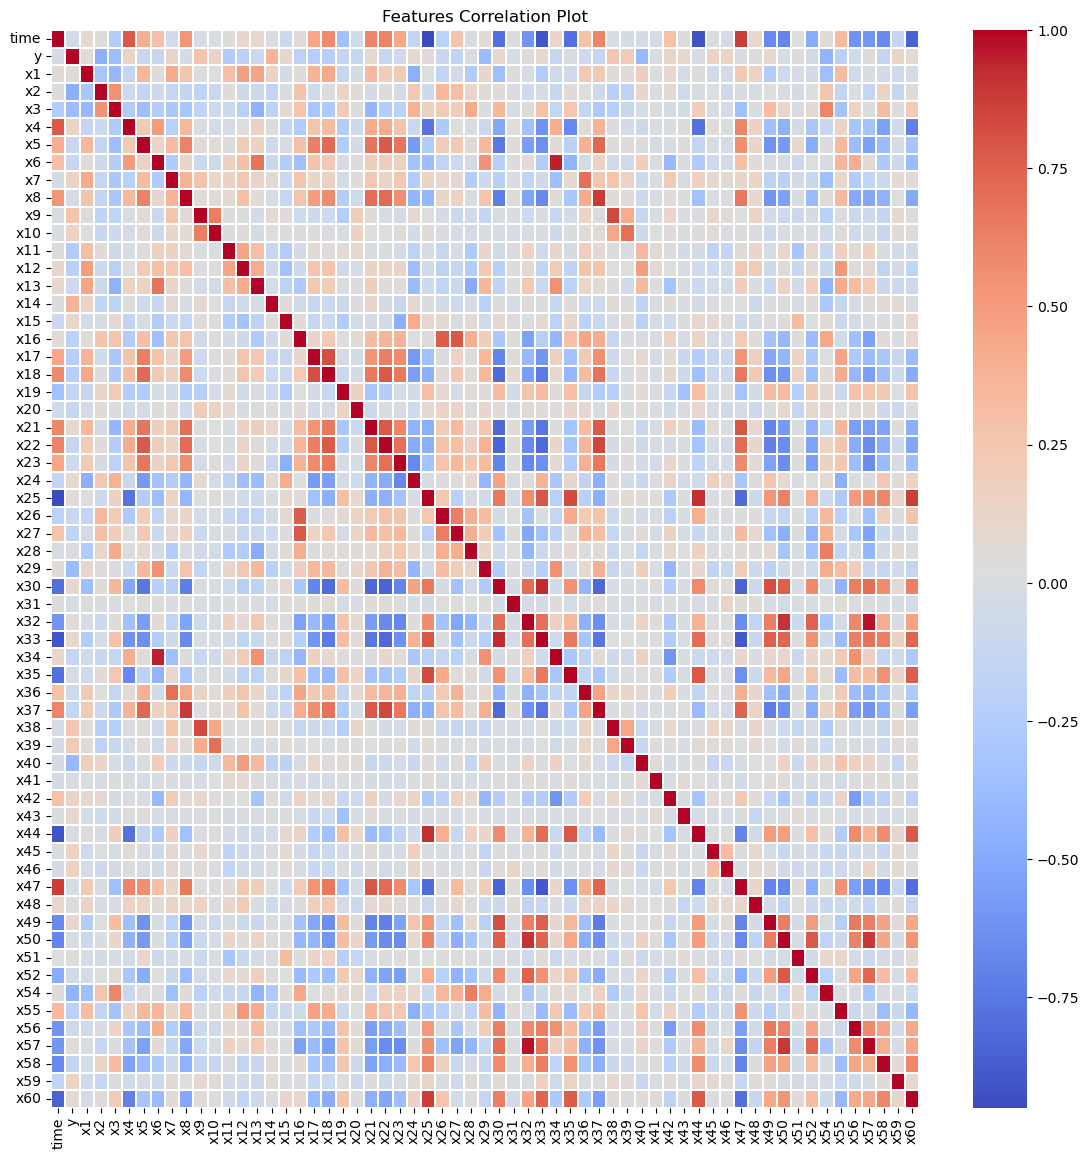

In [15]:
plt.figure(figsize = (14,14))
plt.title('Features Correlation Plot')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="coolwarm")
plt.show()

## Feature Engineering

In [16]:
# transforming datatype of 'time' feature
# Adding new features
if 'time' in data.columns:
    data['hour'] = data['time'].dt.hour
    data['month'] = data['time'].dt.month
    data['date'] = data['time'].dt.day

In [17]:
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x54,x55,x56,x57,x58,x59,x60,hour,month,date
0,1999-05-02 05:32:00,0,-0.581214,-3.390954,3.297203,128.410132,0.021352,-2.817802,0.052928,-0.014526,...,2.621830,-12.931332,-69.720938,-1.470630,0.018519,2.538279,0.007928,5,5,2
1,1999-05-02 05:42:00,0,-0.683737,-3.140092,3.710118,128.410162,0.119100,-4.533104,0.050782,-0.021135,...,2.614077,-16.658505,-73.817160,0.452037,0.016828,2.543490,0.007893,5,5,2
2,1999-05-02 09:08:00,0,-0.721642,0.246852,5.382126,159.973914,-0.189448,17.343514,0.050782,-0.000993,...,2.714456,-20.003354,-54.164359,-1.165393,0.015653,2.512766,0.007167,9,5,2
3,1999-05-02 09:16:00,0,-0.817066,-0.184258,5.671269,171.346625,-0.272852,24.940438,0.040711,-0.000993,...,2.714103,-16.146298,-58.437872,-0.860218,0.014266,2.451929,0.007138,9,5,2
4,1999-05-02 09:24:00,0,-0.768051,-0.026263,5.693081,-322.781610,-0.296961,32.206276,-0.009338,-0.011064,...,2.713750,-20.718075,-49.407050,-1.403491,0.013926,2.283060,0.007110,9,5,2


In [18]:
# Checking the data types of each column
data.dtypes

time     datetime64[ns]
y                 int64
x1              float64
x2              float64
x3              float64
              ...      
x59             float64
x60             float64
hour              int32
month             int32
date              int32
Length: 64, dtype: object

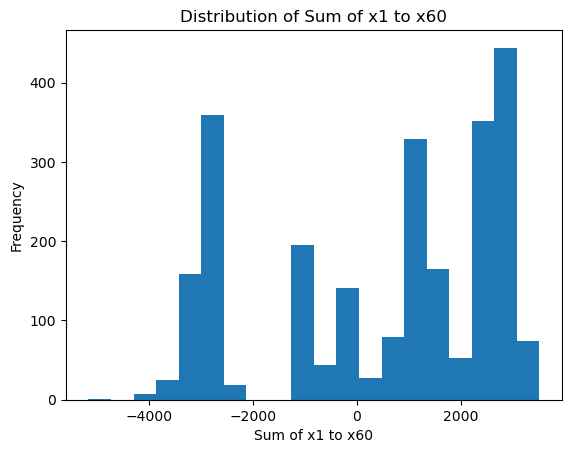

In [19]:
# Aggregating features
data['sum'] = data.iloc[:, 2:60].sum(axis=1)

plt.hist(data['sum'], bins=20) 
plt.xlabel('Sum of x1 to x60')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of x1 to x60')
plt.show()

In [20]:
data['mean'] = data.iloc[:, 2:61].mean(axis=1)
data['std'] = data.iloc[:, 2:61].std(axis=1)
data['min'] = data.iloc[:, 2:61].min(axis=1)
data['max'] = data.iloc[:, 2:61].max(axis=1)

In [21]:
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x59,x60,hour,month,date,sum,mean,std,min,max
0,1999-05-02 05:32:00,0,-0.581214,-3.390954,3.297203,128.410132,0.021352,-2.817802,0.052928,-0.014526,...,2.538279,0.007928,5,5,2,1452.178548,24.613330,187.968781,-105.24527,1425.42387
1,1999-05-02 05:42:00,0,-0.683737,-3.140092,3.710118,128.410162,0.119100,-4.533104,0.050782,-0.021135,...,2.543490,0.007893,5,5,2,1462.970351,24.796241,188.863459,-102.00949,1432.50004
2,1999-05-02 09:08:00,0,-0.721642,0.246852,5.382126,159.973914,-0.189448,17.343514,0.050782,-0.000993,...,2.512766,0.007167,9,5,2,1564.251074,26.512852,181.345615,-104.63089,1374.41215
3,1999-05-02 09:16:00,0,-0.817066,-0.184258,5.671269,171.346625,-0.272852,24.940438,0.040711,-0.000993,...,2.451929,0.007138,9,5,2,1613.702471,27.351010,178.548224,-107.57211,1350.91215
4,1999-05-02 09:24:00,0,-0.768051,-0.026263,5.693081,-322.781610,-0.296961,32.206276,-0.009338,-0.011064,...,2.283060,0.007110,9,5,2,1147.073795,19.442049,181.786015,-322.78161,1339.14067


In [22]:
X = data.drop(['time', 'y'], axis=1)  # Let 'time' is not a feature for prediction
y = data['y']

### Oversampling

In [23]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:
y_resampled.value_counts()


y
0    2347
1    2347
Name: count, dtype: int64

**We have removed outliers from the majority class and applied oversampling techniques to handle the class imbalance of target variable. This part was very crucial ensuring that the models could better learn from the Minority class.**

Now the target class is balanced.

## Model Selection and Training

### train-test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42) 
X_train, X_val, y_train, y_val = train_test_split( X_train,y_train, test_size= 0.25, random_state=42) 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape) 
print("X_val shape:",X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape) 
print("y_val shape:",y_val.shape) 

X_train shape: (2816, 67)
X_test shape: (939, 67)
X_val shape: (939, 67)
y_train shape: (2816,)
y_test shape: (939,)
y_val shape: (939,)


In [26]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_val_scaled = scaler.transform(X_val) 
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [27]:
lr = LogisticRegression(class_weight='balanced',max_iter=1000).fit(X_train_scaled,y_train)   
lr_pred=lr.predict(X_val_scaled) 


In [28]:
# Evaluate the model
lr_accuracy = accuracy_score(y_val, lr_pred)
lr_classreport= classification_report(y_val, lr_pred)
lr_auc_roc = roc_auc_score(y_val, lr_pred)

print("*****************************Logistic Regression***********************:")
print(f"Accuracy: {lr_accuracy:.4f}")
print("Classification Report:\n", lr_classreport)
print(f"roc_auc_score: {lr_auc_roc:.4f}")



*****************************Logistic Regression***********************:
Accuracy: 0.9681
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       503
           1       0.99      0.94      0.96       436

    accuracy                           0.97       939
   macro avg       0.97      0.97      0.97       939
weighted avg       0.97      0.97      0.97       939

roc_auc_score: 0.9665


The **ROC-AUC** Score obtained with **Logistic Regression** is **0.9665**

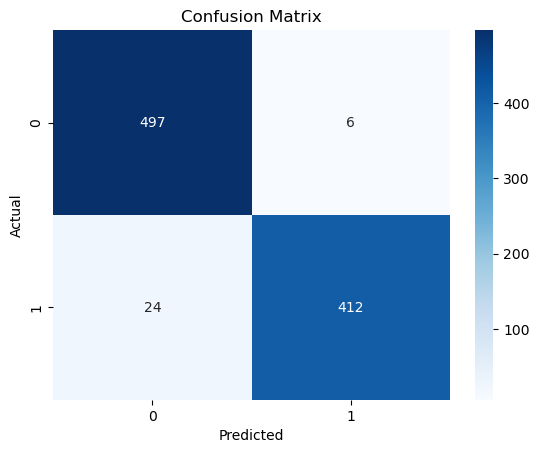

In [29]:
cnf_matrix_lr= confusion_matrix(y_val,lr_pred) 
sns.heatmap(cnf_matrix_lr,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

In [30]:
#Hyperparameter tuning of the model
param_grid_lr={
    'C':[0.01,0.1,1,10,100],
    'solver': ['liblinear', 'saga']
} 

grid_search_lr=GridSearchCV(lr,param_grid_lr,cv=5,scoring='accuracy') 
grid_search_lr.fit(X_train_scaled, y_train) 

best_lr=grid_search_lr.best_estimator_

In [31]:
best_lr

LogisticRegression(C=100, class_weight='balanced', max_iter=1000,
                   solver='liblinear')

In [32]:
best_lr.fit(X_train_scaled,y_train) 
best_lr_pred= best_lr.predict(X_val_scaled) 

In [33]:
# Evaluate the model
best_lr_acc = accuracy_score(y_val, best_lr_pred)
best_lr_classreport= classification_report(y_val, best_lr_pred)
best_lr_auc_roc = roc_auc_score(y_val, best_lr_pred)

print("*****************************Best Logistic Regression***********************:")
print(f"Accuracy: {best_lr_acc:.4f}")
print("Classification Report:\n", best_lr_classreport)
print(f"roc_auc_score: {best_lr_auc_roc:.4f}")



*****************************Best Logistic Regression***********************:
Accuracy: 0.9734
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       503
           1       0.97      0.97      0.97       436

    accuracy                           0.97       939
   macro avg       0.97      0.97      0.97       939
weighted avg       0.97      0.97      0.97       939

roc_auc_score: 0.9735


The **ROC-AUC** Score obtained with **Best Logistic Regression** is **0.9735**

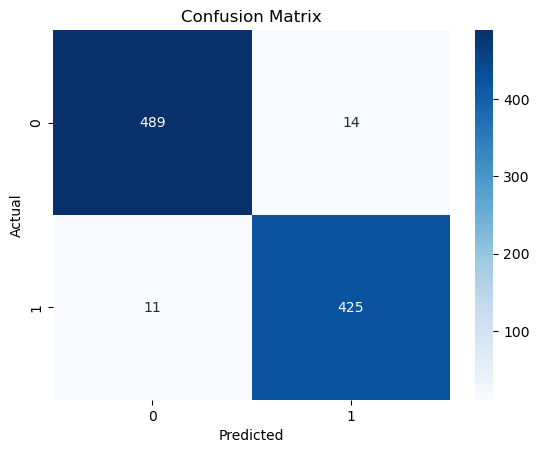

In [34]:
cnf_matrix_bestlr= confusion_matrix(y_val,best_lr_pred) 
sns.heatmap(cnf_matrix_bestlr,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

### Random Forest Classifier

In [35]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [36]:
y_pred_rf = rf.predict(X_val_scaled)


In [37]:
# Evaluate the model
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_class_report= classification_report(y_val, y_pred_rf)
rf_auc_roc = roc_auc_score(y_val, y_pred_rf)

print("*****************************Random Forest Classifier***********************:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", rf_class_report)
print(f"roc_auc_score: {rf_auc_roc:.4f}")



*****************************Random Forest Classifier***********************:
Accuracy: 0.9936
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       503
           1       0.99      1.00      0.99       436

    accuracy                           0.99       939
   macro avg       0.99      0.99      0.99       939
weighted avg       0.99      0.99      0.99       939

roc_auc_score: 0.9937


The **ROC-AUC** Score obtained with **Random Forest Classifier** is **0.9937**

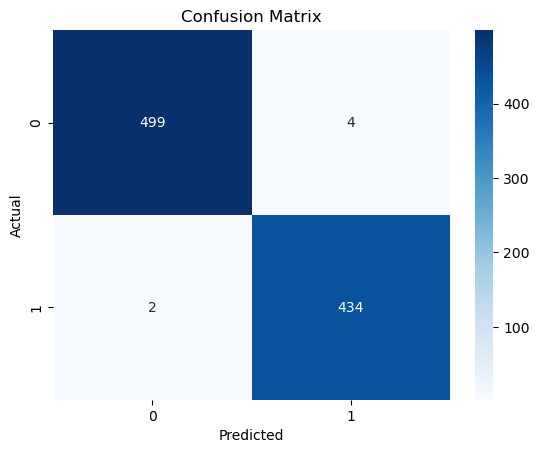

In [38]:
cnf_matrix_rf= confusion_matrix(y_val,y_pred_rf) 
sns.heatmap(cnf_matrix_rf,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

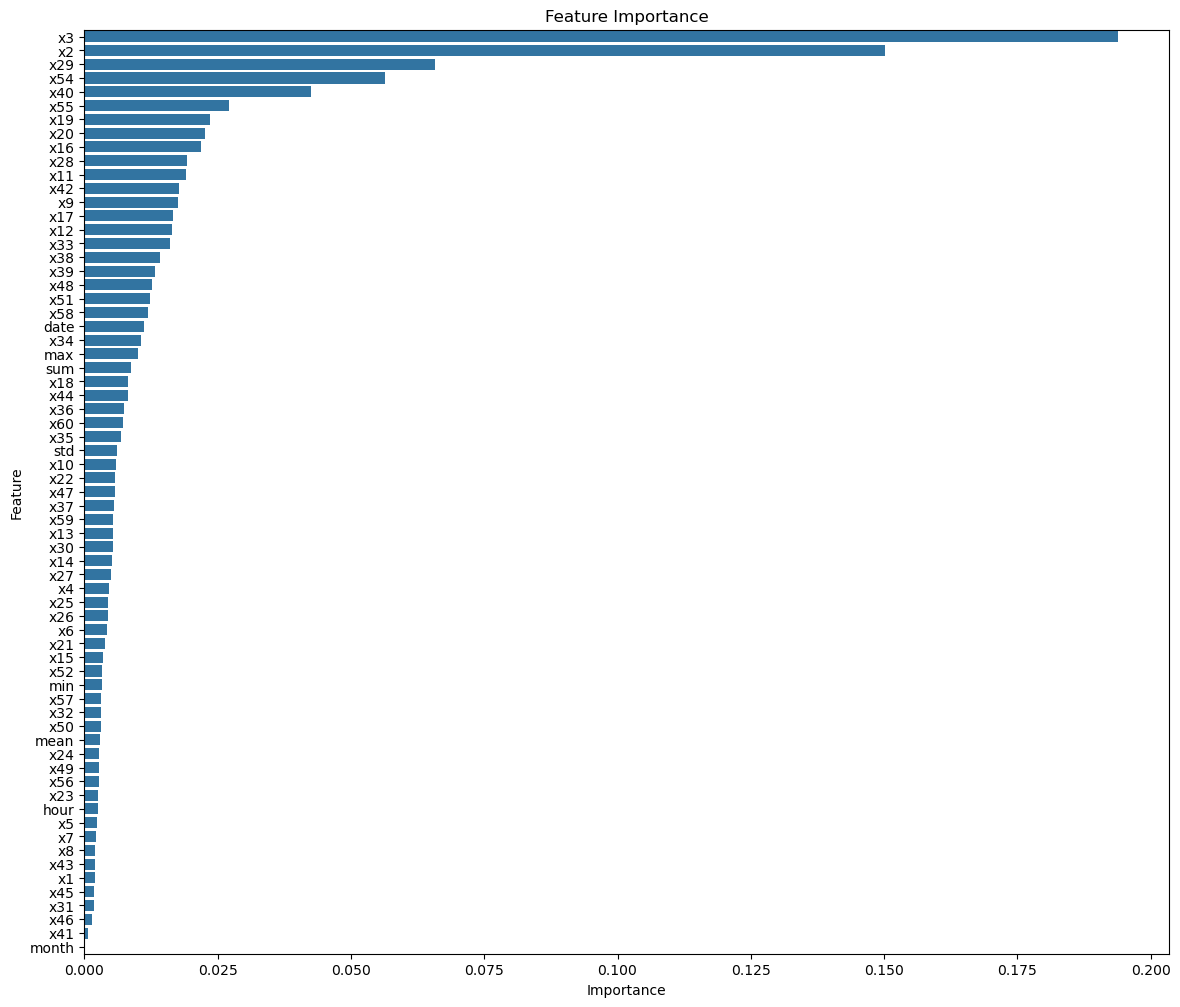

In [39]:
importance = rf.feature_importances_
features = X_resampled.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


### Support Vector Machine

In [40]:
svm_clf = SVC(probability=True)


In [41]:
svm_clf.fit(X_train_scaled,y_train) 
svm_pred= svm_clf.predict(X_val_scaled) 

In [42]:
# Evaluate the model
svm_accuracy = accuracy_score(y_val, svm_pred)
svm_classreport= classification_report(y_val, svm_pred)
svm_auc_roc = roc_auc_score(y_val, svm_pred)

print("*****************************Support Vector Machine***********************:")
print(f"Accuracy: {svm_accuracy:.4f}")
print("Classification Report:\n", svm_classreport)
print(f"roc_auc_score: {svm_auc_roc:.4f}")



*****************************Support Vector Machine***********************:
Accuracy: 0.9734
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       503
           1       0.99      0.95      0.97       436

    accuracy                           0.97       939
   macro avg       0.98      0.97      0.97       939
weighted avg       0.97      0.97      0.97       939

roc_auc_score: 0.9718


The **ROC-AUC** Score obtained with **SVM** is **0.9718**

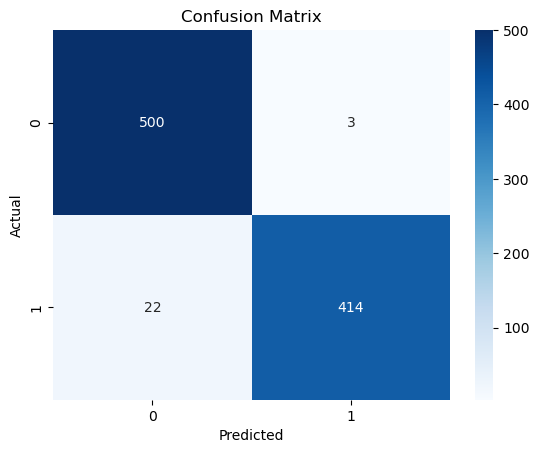

In [43]:
cnf_matrix_svm= confusion_matrix(y_val,svm_pred) 
sns.heatmap(cnf_matrix_svm,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

In [44]:
#Hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train)

best_svm = grid_search_svm.best_estimator_

In [45]:
best_svm.fit(X_train_scaled,y_train) 
best_svm_pred= best_svm.predict(X_val_scaled) 

In [46]:
# Evaluate the model
best_svm_acc = accuracy_score(y_val, best_svm_pred)
best_svm_classreport= classification_report(y_val, best_svm_pred)
best_svm_auc_roc = roc_auc_score(y_val, best_svm_pred)

print("*****************************Best SVM***********************:")
print(f"Accuracy: {best_svm_acc:.4f}")
print("Classification Report:\n", best_svm_classreport)
print(f"roc_auc_score: {best_svm_auc_roc:.4f}")



*****************************Best SVM***********************:
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       503
           1       1.00      1.00      1.00       436

    accuracy                           1.00       939
   macro avg       1.00      1.00      1.00       939
weighted avg       1.00      1.00      1.00       939

roc_auc_score: 1.0000


The **ROC-AUC** Score obtained with **Best SVM** is **1.00**

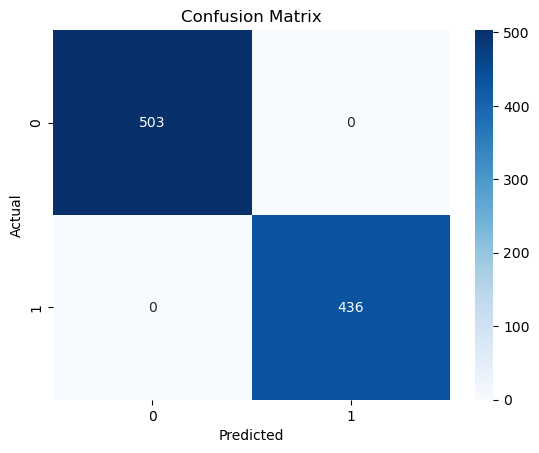

In [47]:
cnf_matrix_bestsvm= confusion_matrix(y_val,best_svm_pred) 
sns.heatmap(cnf_matrix_bestsvm,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

### XGBoost Classifier

In [48]:
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False) 
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_val_scaled)


In [49]:
# Evaluate the model
xgb_accuracy = accuracy_score(y_val, xgb_pred)
xgb_classreport= classification_report(y_val, xgb_pred)
xgb_auc_roc = roc_auc_score(y_val, xgb_pred)

print("*****************************XGBoost Classifier***********************:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print("Classification Report:\n", xgb_classreport)
print(f"roc_auc_score: {xgb_auc_roc:.4f}")



*****************************XGBoost Classifier***********************:
Accuracy: 0.9947
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       503
           1       0.99      1.00      0.99       436

    accuracy                           0.99       939
   macro avg       0.99      0.99      0.99       939
weighted avg       0.99      0.99      0.99       939

roc_auc_score: 0.9949


The **ROC-AUC** Score obtained with **XGBoost Classifier** is **0.9949**

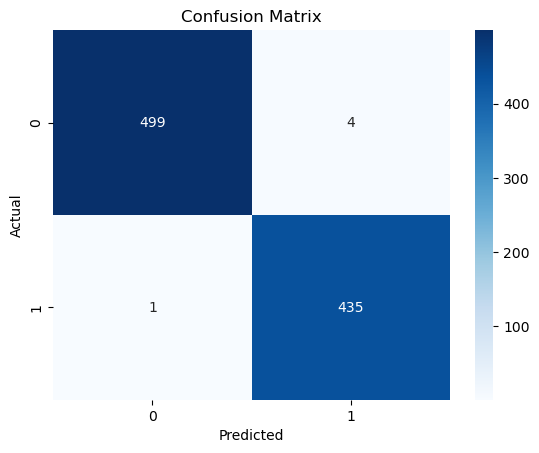

In [50]:
cnf_matrix_xgb= confusion_matrix(y_val,xgb_pred) 
sns.heatmap(cnf_matrix_xgb,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

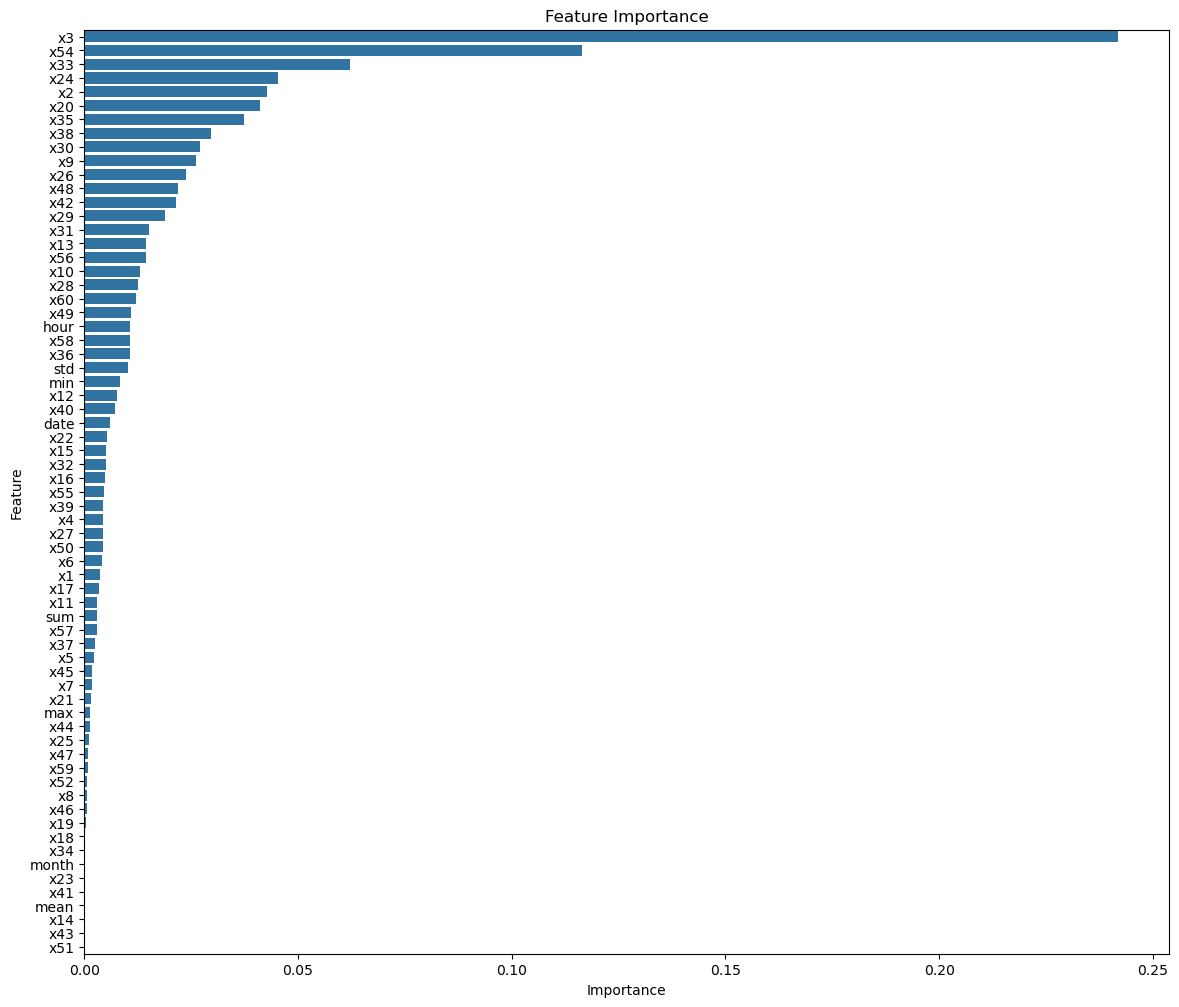

In [51]:
importance = xgb.feature_importances_
features = X_resampled.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## Predict test Data

Let's predict the test data using **Random Forest Classifier**

In [52]:
rf_pred_test = rf.predict(X_test_scaled)
rf_pred_proba_test = rf.predict_proba(X_test_scaled)[:, 1]


In [53]:
# Evaluate the model
test_acc_rf = accuracy_score(y_test, rf_pred_test)
test_rf_classreport= classification_report(y_test, rf_pred_test)
test_auc_roc_rf = roc_auc_score(y_test, rf_pred_proba_test)

print("*****************************Random Forest Classifier***********************:")
print(f"Accuracy: {test_acc_rf:.4f}")
print("Classification Report:\n", test_rf_classreport)
print(f"roc_auc_score: {test_auc_roc_rf:.4f}")



*****************************Random Forest Classifier***********************:
Accuracy: 0.9968
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       471

    accuracy                           1.00       939
   macro avg       1.00      1.00      1.00       939
weighted avg       1.00      1.00      1.00       939

roc_auc_score: 1.0000


The **ROC-AUC** Score obtained with **Random Forest Classifier** on **test data** is **1.00**

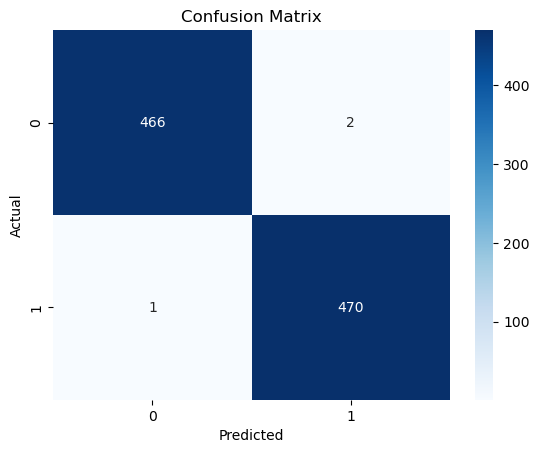

In [54]:
cnf_matrix_rf_test= confusion_matrix(y_test,rf_pred_test) 
sns.heatmap(cnf_matrix_rf_test,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

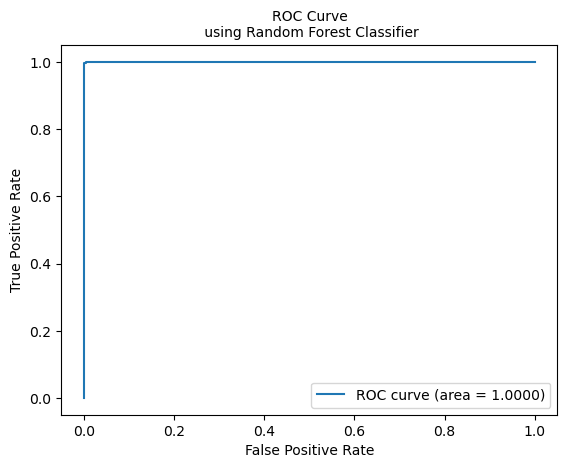

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_proba_test)
plt.plot(fpr, tpr, label=f'ROC curve (area = {test_auc_roc_rf:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve\n using Random Forest Classifier', fontsize=10)
plt.legend(loc='best')
plt.show()

Let's predict the test data using **XGBoost Classifier**

In [56]:
xgb_pred_test= xgb.predict(X_test_scaled) 
xgb_pred_proba_test = xgb.predict_proba(X_test_scaled)[:, 1]


In [57]:
# Evaluate the model
xgb_test_accuracy = accuracy_score(y_test, xgb_pred_test)
xgb_test_classreport= classification_report(y_test, xgb_pred_test)
xgb_test_auc_roc = roc_auc_score(y_test, xgb_pred_proba_test)

print("*****************************XGBoost Classifier***********************:")
print(f"Accuracy: {xgb_test_accuracy:.4f}")
print("Classification Report:\n", xgb_test_classreport)
print(f"roc_auc_score: {xgb_test_auc_roc:.4f}")



*****************************XGBoost Classifier***********************:
Accuracy: 0.9989
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       471

    accuracy                           1.00       939
   macro avg       1.00      1.00      1.00       939
weighted avg       1.00      1.00      1.00       939

roc_auc_score: 1.0000


The **ROC-AUC** Score obtained with **XGBoost Classifier** on **test data** is **1.00**

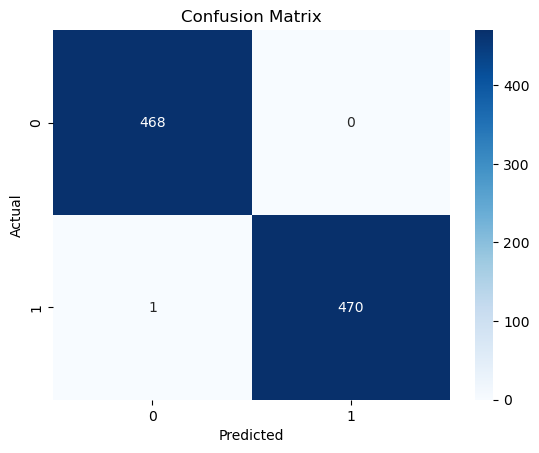

In [58]:
cnf_matrix_xgb_test= confusion_matrix(y_test,xgb_pred_test) 
sns.heatmap(cnf_matrix_xgb_test,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

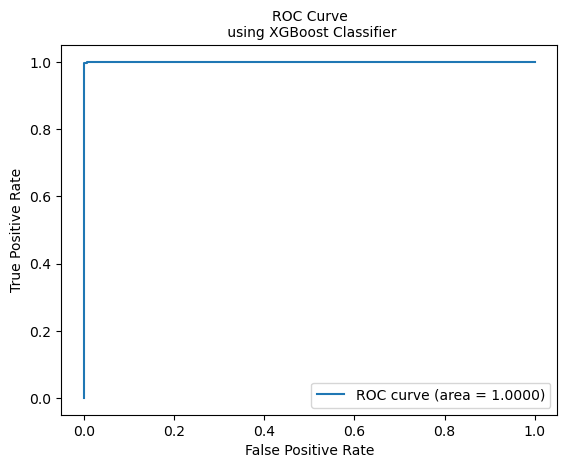

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_proba_test)
plt.plot(fpr, tpr, label=f'ROC curve (area = {xgb_test_auc_roc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve\n using XGBoost Classifier', fontsize=10)
plt.legend(loc='best')
plt.show()

Let's predict the test data using **Best Support Vector Machine**

In [60]:
svm_pred_test = best_svm.predict(X_test_scaled)
svm_pred_proba_test = best_svm.predict_proba(X_test_scaled)[:, 1]


In [61]:
# Evaluate the model
svm_test_accuracy = accuracy_score(y_test, svm_pred_test)
svm_test_classreport= classification_report(y_test, svm_pred_test)
svm_test_auc_roc = roc_auc_score(y_test, svm_pred_proba_test)

print("***************************** Best Support Vector Machine***********************:")
print(f"Accuracy: {svm_test_accuracy:.4f}")
print("Classification Report:\n", svm_test_classreport)
print(f"roc_auc_score: {svm_test_auc_roc:.4f}")



***************************** Best Support Vector Machine***********************:
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       471

    accuracy                           1.00       939
   macro avg       1.00      1.00      1.00       939
weighted avg       1.00      1.00      1.00       939

roc_auc_score: 1.0000


The **ROC-AUC** Score obtained with **Best SVM** on **test data** is **1.00**

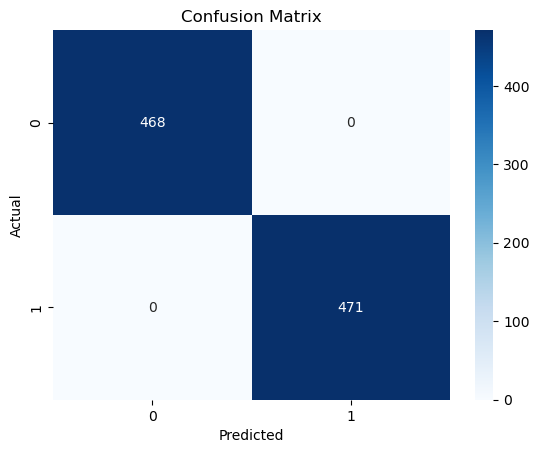

In [62]:
cnf_matrix_bestsvm_test= confusion_matrix(y_test,svm_pred_test) 
sns.heatmap(cnf_matrix_bestsvm_test,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

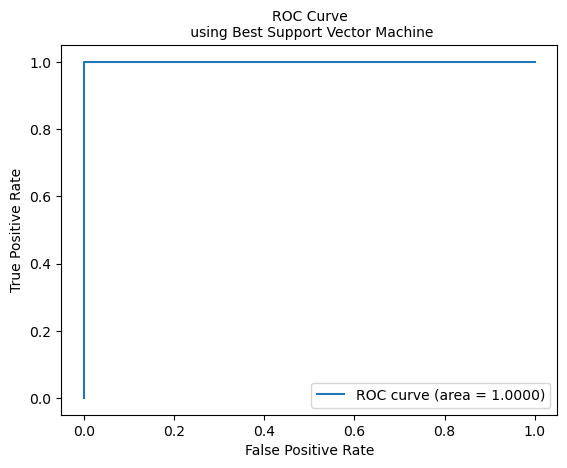

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_proba_test)
plt.plot(fpr, tpr, label=f'ROC curve (area = {svm_test_auc_roc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve\n using Best Support Vector Machine', fontsize=10)
plt.legend(loc='best')
plt.show()

Let's predict the test data using **Best Logistic Regression**

In [64]:
lr_pred_test = best_lr.predict(X_test_scaled)
lr_pred_proba_test = best_lr.predict_proba(X_test_scaled)[:, 1]


In [65]:
# Evaluate the model
lr_test_accuracy = accuracy_score(y_test, lr_pred_test)
lr_test_classreport= classification_report(y_test, lr_pred_test)
lr_test_auc_roc = roc_auc_score(y_test, lr_pred_proba_test)

print("***************************** Best Logistic Regression***********************:")
print(f"Accuracy: {lr_test_accuracy:.4f}")
print("Classification Report:\n", lr_test_classreport)
print(f"roc_auc_score: {lr_test_auc_roc:.4f}") 



***************************** Best Logistic Regression***********************:
Accuracy: 0.9925
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       468
           1       0.99      1.00      0.99       471

    accuracy                           0.99       939
   macro avg       0.99      0.99      0.99       939
weighted avg       0.99      0.99      0.99       939

roc_auc_score: 0.9995


The **ROC-AUC** Score obtained with **Best Logistic Regression** on **test data** is **0.99**

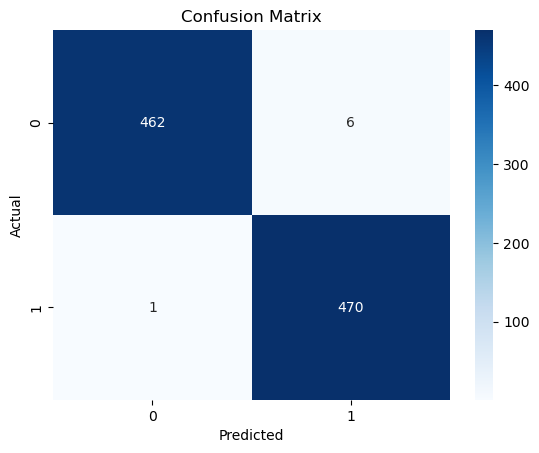

In [66]:
cnf_matrix_bestlr_test= confusion_matrix(y_test,lr_pred_test) 
sns.heatmap(cnf_matrix_bestlr_test,annot=True,fmt='d',cmap='Blues') 
plt.title("Confusion Matrix") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show()

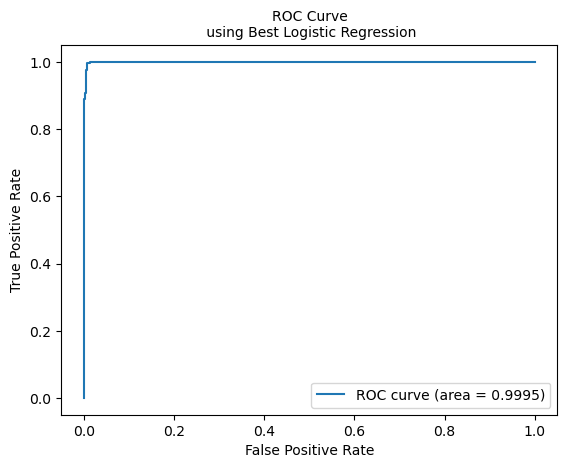

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_proba_test)
plt.plot(fpr, tpr, label=f'ROC curve (area = {lr_test_auc_roc:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve\n using Best Logistic Regression', fontsize=10)
plt.legend(loc='best')
plt.show()

In [68]:
# Saving the models
models={
    'random_forest': rf,
    'xgboost': xgb,
    'svm': best_svm,
    'logistic_regression': best_lr 
} 
joblib.dump(models,'Anomaly_Detection_models.pkl') 

['Anomaly_Detection_models.pkl']

In [69]:
# Loading the models
models=joblib.load('Anomaly_Detection_models.pkl') 

## Conclusion

We investigated the dataset, checked for missing values, data types and class imbalance, visualized the features and relationship between different features, transformed data type of 'time' feature and added new features for model's performance, handled target class imbalance by removing outliers and oversampling techniques. The data was split in 3 parts, a train set, a validation set and a test set. Also Scaled features using StandardScalar.

We started with *Logistic Regression*, for which accuracy score was **0.96** for scaled validation set, we did hyperparameter tuning and applied GridSearchCV for model's improvement.

We followed with *Random Forest Classifier*, for which accuracy score was **0.99** for scaled validation set, also visualized Random Forest Classifier's in-built attribute 'feature_importances_'.

We followed with *Support Vector Machine*, for which accuracy score was **0.97** for scaled validation set,we did hyperparameter tuning and applied GridSearchCV for model's improvement.

Finally we experimented with *XGBoost Classifier*, for which accuracy score was **0.99** for scaled validation set, also visualized XGBoost Classifier's in-built attribute 'feature_importances_'.

As all the models showed high accuracy on scaled validation set, we used the models to predict the scaled test data; the AUC scores obtained for all models were **0.99 or 1.00**

We assessed model's performance using metrics such as confusion matrix, classification reports, ROC-AUC scores, and ROC curves.
The trained models were saved for future use, ensuring that we can easily load and apply them for predictions on new data.

Overall, this project successfully implemented an end-to-end anomaly detection pipeline for predictive maintenance, demonstrating its capability to identify potential equipment failures with high accuracy. The high performance metrics obtained during model evaluation validate its effectiveness in detecting anomalies and ensuring timely interventions. Future enhancements, such as incorporating additional data sources like weather data,operational logs, deploying the model in a real-time monitoring system, and refining feature engineering techniques, can further improve performance and scalability.